# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [11]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

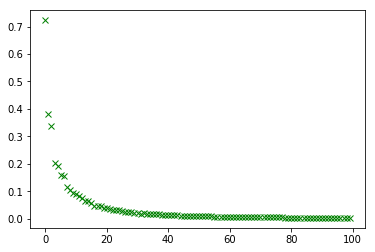

In [12]:
# Samples corresponding to the last digit of your roll number - 9(plot a)
from numpy import linalg as LA

cov9 = []
for i in range(len(train_labels)):
    if train_labels[i] == 9:
        cov9.append(train_data[i])

cov9 = np.cov(cov9, rowvar=False)
eigval, eigvec = LA.eig(cov9)
norm_eig = eigval.real/LA.norm(eigval)
plt.plot(norm_eig[0:100],'gx')

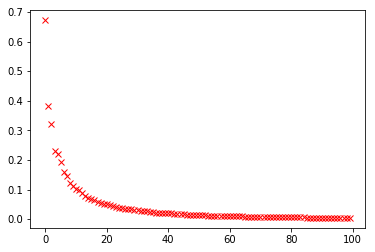

In [13]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
cov_friend = []
for i in range(len(train_labels)):
    if train_labels[i] == 2:
        cov_friend.append(train_data[i])
cov_friend = np.cov(cov_friend, rowvar=False)
eigval, eigvec = LA.eig(cov_friend)
norm_eig = eigval.real/LA.norm(eigval)
plt.plot(norm_eig[0:100],'rx')

# print (cov_friend)

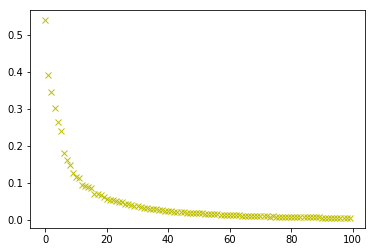

In [14]:
# All training data (plot c)
cov_total = np.cov(train_data, rowvar=False)
eigval, eigvec = LA.eig(cov_total)
norm_eig = eigval.real/LA.norm(eigval)
plt.plot(norm_eig[0:100],'yx')

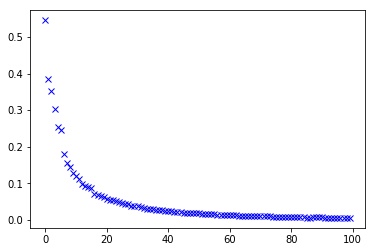

In [15]:
# Randomly selected 50% of the training data (plot d)
length = int(train_labels.size/2)
x = [i for i in range(train_labels.size)]
random_cov_ind = np.random.choice(x, length)
random_cov = []
for i in range(length):
    random_cov.append(train_data[random_cov_ind[i]])
random_cov = np.cov(random_cov, rowvar=False)
eigval, eigvec = LA.eig(random_cov)
norm_eig = eigval.real/LA.norm(eigval)
# print (eigval)
plt.plot(norm_eig[0:100], 'bx')

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit)
1. Slightly different. The plots for a and b are similar as data is independently and identically distributed. The small differences arise because we are looking at the plots for 2 different images of numbers, which inadvertently have different covariance matrices and eigen values. 

2. Yes, because c corresponds to the entire sample set and the general pixel intensities across all classes cannot capture the individual differences in the top 2 or 3 eigenvalues, so needs to be of higher rank. This lack of structure explains why the largest eigenvector in c is smaller than in b.  

3. If we consider all eigenvalues above a threshold (0.2):   
 Plot 1 - rank 4  
 Plot 2 - rank 5  
 Plot 3 - rank 6  
 Plot 4 - rank 6  


---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)
1. 2^784 images (approx. 1.017458e+236) since each of the 784 elements is in {0,1}.
2. 7000 out of (2^784) which is approx. 5.897048e-231% (pretty small).
3. The eigenspectrum would be a single straight line as the data matrix has a full rank and needs every dimension to accurately capture and project this data.
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit) 
  
If the data was multiplied by an orthonormal matrix, it would not change the lengths or angles of the vectors. 
To prove this, consider a matrix X and its covariance matrix C = $\frac{1}{N}$\*$\sum$ [(X-U)\*(X-U)$^{T}$]. 
When an orthonormal matrix A is multiplied to it, X -> AX and mean(X) U -> AU. Hence, C' = $\frac{1}{N}$\*$\sum$ [(AX-AU)\*(AX-AU)$^{T}$] = $\frac{1}{N}$\*$\sum$ [A*(X-U)*(X-U)$^{T}$*(A)$^T$].  
This is similar to C and is only different by a scalar, i.e. C' =  $\frac{1}{N}$\*$\sum$ [A*C*(A)$^T$]


---

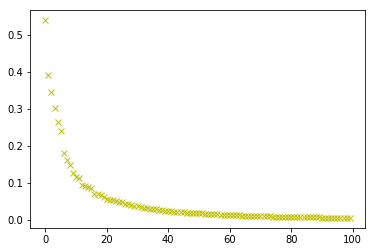

In [16]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
# code goes here
_,y = train_data.shape
a = np.random.randn(y,y)
q, r = LA.qr(a, mode='complete')

# All training data (plot c)
cov_total = np.cov(np.matmul(train_data, q), rowvar=False)
eigval, eigvec = LA.eig(cov_total)
norm_eig = eigval.real/LA.norm(eigval)
plt.plot(norm_eig[0:100],'yx')


### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)

The eigen spectrum becomes a graph with just one eigen value at 1.0, while the rest becomes 0. There will be atmost one non-zero eigen value.

---

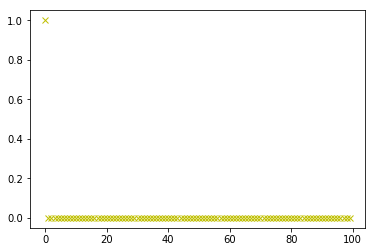

In [17]:
#rank 1 matrix
mata = np.ones( (784, 784) )
mata[0][0] = 5

#rank 2 matrix
matb = np.ones( (784, 784) )
matb[0][0] = 5
matb[1][1] = 6

cov_total = np.cov(np.matmul(train_data, matb), rowvar=False)
eigval, eigvec = LA.eig(cov_total)
norm_eig = eigval.real/LA.norm(eigval)
plt.plot(norm_eig[0:100],'yx')

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

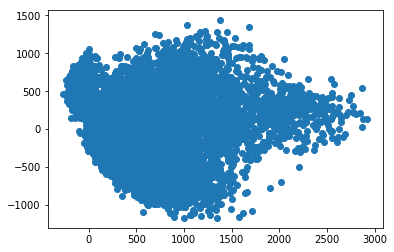

In [18]:
# Plotting code here

cov_total = np.cov(train_data, rowvar=False)
eigval, eigvec = LA.eig(cov_total)
# norm_eig = eigval.real/LA.norm(eigval)
eig2 = eigvec[:,0:2]
project = np.dot(train_data, eig2)
x = project[:,0]
y = project[:,1]
plt.scatter(x.real,y.real)

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [21]:
# Print accuracy on the test set using MLE
_,y = train_data.shape
classes = [0,1,2,3,4,5,6,7,8,9]
class_mean = []
class_cov = []
class_data = [[] for _ in range(10)]
class_eigvals = [] 

def getAccuracy(testSet, predictions, acc):
    if testSet == predictions:
        acc += 1 
    return acc

for i in classes:
    for j in range(len(train_data)):
        if train_labels[j] == i:
            class_data[i].append(train_data[j]) 
            
for i in range(10):
    class_mean.append(np.mean(class_data[i],0))
#     covarr = np.cov(class_data[i], rowvar=False)
#     print (meanarr == np.mean(class_data[i],0))

    covarr = np.matmul((class_data[i]-np.mean(class_data[i],0)).T, (class_data[i]-np.mean(class_data[i],0)))/600
    class_cov.append(LA.pinv(covarr))
    eigvals,_ = LA.eig(covarr)
    class_eigvals.append(eigvals)
#     print (eigvals)
acc = 0   
for j in range(len(test_data)):
    mle = [] 
    for i in range(10):
        det = 0
        for k in range(len(class_eigvals[i])):
            if class_eigvals[i][k].real > 0 :
                det += np.log(class_eigvals[i][k].real)
        dim = len(class_mean[i])
        res1 = -(1/2) * ((test_data[j]-class_mean[i]).T)@(class_cov[i])@(test_data[j]-class_mean[i])
        res2 = - ((dim/2)*np.log(2*np.pi) + (1/2)*(det))
        mle.append((res1+res2))

    mle_class = np.argmax(mle)
    acc = getAccuracy(mle_class, test_labels[j], acc)
        
print("Accuracy with MLE: " + repr(acc*100/len(test_data)))


Accuracy with MLE: 74.2


In [22]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

#we take prior as 1/10 since there are 10 classes and each class has equal number of samples, which implies 
#that the prior probability of being in any of those classes is equal

prior = 1/10

_,y = train_data.shape
classes = [0,1,2,3,4,5,6,7,8,9]
class_mean = []
class_cov = []
class_data = [[] for _ in range(10)]
class_eigvals = [] 

def getAccuracy(testSet, predictions, acc):
    if testSet == predictions:
        acc += 1 
    return acc

for i in classes:
    for j in range(len(train_data)):
        if train_labels[j] == i:
            class_data[i].append(train_data[j]) 
            
for i in range(10):
    class_mean.append(np.mean(class_data[i],0))
    covarr = np.matmul((class_data[i]-np.mean(class_data[i],0)).T, (class_data[i]-np.mean(class_data[i],0)))/600
    class_cov.append(LA.pinv(covarr))
    eigvals,_ = LA.eig(covarr)
    class_eigvals.append(eigvals)
#     print (eigvals)
acc = 0   
for j in range(len(test_data)):
    mle = [] 
    for i in range(10):
        det = 0
        for k in range(len(class_eigvals[i])):
            if class_eigvals[i][k].real > 0 :
                det += np.log(class_eigvals[i][k].real)
        dim = len(class_mean[i])
        res1 = -(1/2) * ((test_data[j]-class_mean[i]).T)@(class_cov[i])@(test_data[j]-class_mean[i])
        res2 = - ((dim/2)*np.log(2*np.pi) + (1/2)*(det))
        mle.append((res1+res2) * prior)

    mle_class = np.argmax(mle)
    acc = getAccuracy(mle_class, test_labels[j], acc)
        
print("Accuracy with MAP: " + repr(acc*100/len(test_data)))


Accuracy with MAP: 74.2


In [24]:
# Print accuracy using Bayesian pairwise majority voting method
_,y = train_data.shape
classes = [0,1,2,3,4,5,6,7,8,9]
class_mean = []
class_cov = []
class_inv = []
class_data = [[] for _ in range(10)]
class_eigvals = [] 
test_prob = np.zeros((1000,10))
pairs = []

def getAccuracy(predicted, labels):
    acc = 0
    for i in range(1000):
        if np.argmax(predicted[i]) == test_labels[i]:
            acc += 1 
    acc = acc*100/len(labels)
    return acc

for i in classes:
    for j in range(len(train_data)):
        if train_labels[j] == i:
            class_data[i].append(train_data[j])
for i in classes:
    for j in range(i+1, len(classes)):
        if i != classes[j]:
            pairs.append([i,classes[j]])
    m = np.mean(class_data[i],0)
    class_mean.append(m)
    class_cov.append(np.matmul((class_data[i]-m).T, (class_data[i]-m))/600 )
            
for i in range(len(pairs)):
    a = pairs[i][0]
    b = pairs[i][1]
    currcov = (class_cov[a] + class_cov[b])/2
    class_inv.append(LA.pinv(currcov))
    eigvals,_ = LA.eig(covarr)
    class_eigvals.append(eigvals)

    for j in range(len(test_data)):
        bay = []       
        for x in range(2):
            det = 0
            inv = class_inv[i]
            evals = class_eigvals[i]
            for k in range(len(evals)):
                if evals[k].real > 0 :
                    det += np.log(evals[k].real)
            if x == 0:
                m = class_mean[a]
            else:
                m = class_mean[b]
            dim = len(m)
            res1 = -(1/2) * ((test_data[j]-m).T)@(inv)@(test_data[j]-m)
            res2 = - ((dim/2)*np.log(2*np.pi) + (1/2)*(det))
            bay.append((res1+res2))
        if bay[0]>bay[1]:
            test_prob[j][a] += 1
        else:
            test_prob[j][b] += 1

print (getAccuracy(test_prob, test_labels))
    
            

83.8


In [26]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

_,y = train_data.shape
classes = [0,1,2,3,4,5,6,7,8,9]
class_mean = []
class_cov = []
class_inv = []
class_data = [[] for _ in range(10)]
class_eigvals = [] 
test_prob = np.zeros((1000,10))
pairs = []

def getAccuracy(predicted, labels):
    acc = 0
    for i in range(1000):
        if np.argmax(predicted[i]) == test_labels[i]:
            acc += 1 
    acc = acc*100/len(labels)
    return acc

for i in classes:
    for j in range(len(train_data)):
        if train_labels[j] == i:
            class_data[i].append(train_data[j])
for i in classes:
    for j in range(i+1, len(classes)):
        if i != classes[j]:
            pairs.append([i,classes[j]])
    m = np.mean(class_data[i],0)
    class_mean.append(m)


for i in range(len(pairs)):
    a = pairs[i][0]
    b = pairs[i][1]

    for j in range(len(test_data)):
        perp = []       
        for x in range(2):
            if x == 0:
                m = class_mean[a]
            else:
                m = class_mean[b]
            dist = LA.norm(test_data[j] - m)
            perp.append(dist)
        if perp[0] < perp[1]:
            test_prob[j][a] += 1
        else:
            test_prob[j][b] += 1

print (getAccuracy(test_prob, test_labels))
    
            


77.0


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)
---
1. MLE : 73.2
2. MAP : 73.2
3. Bayesian pairwise majority voting method : 83.8
4. Simple Perpendicular Bisector majority voting method : 77.0  

We notice that the highest accuracy comes while using the Bayesian pairwise combinatorial method, as this takes into consideration the covariance matrices of the classes for computuing the Gaussian multivariate probability distribution, unlike the Perpendicular Bisector method, which only uses norm.  However, Bayesian method is much slower (order of minutes) while MAP and MLE take a few seconds to finish computing.  The accuracies for MAP and MLE are equal because the prior probability for each class in MAP are equally distributed since the number of samples in each are equal.

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [27]:
# Your code here

def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
#         print (i)
        if testSet[i] == int(predictions[i]):
            correct += 1
    return (correct/float(len(testSet))) * 100.0

import operator
from collections import Counter

def euclideanDistance(x1, x2):
    distance = 0
    length = len(x2)
    for i in range(length):
        distance += (x1[i] - x2[i]) * (x1[i] - x2[i]).T
    return np.sqrt(distance)

def getNeighbors(trainingSet, trainingLabels, testSet, testLabels, k):
    predict = []
    for i in range(len(k)):
        x = []
        for j in range(len(testSet)):
            x.append(0)
        predict.append(x)  
    
    for i in range(len(testSet)):
        distances = []
        for j in range(len(trainingSet)):
#             dist = euclideanDistance(testSet[i], trainingSet[j])
            dist = LA.norm(testSet[i] - trainingSet[j],2)
            distances.append((trainingLabels[j], dist))
        distances.sort(key=operator.itemgetter(1))
        maxneighbors = []
        maxk = max(k)
        for x in range(maxk):
            maxneighbors.append(distances[x][0])
#         try:
#             print (mode(neighbors))
#             predict.append(mode(neighbors))
#         except StatisticsError as err:
        
        for x in range(len(k)):
            neighbors = []
            for y in range(k[x]):
                neighbors.append(maxneighbors[y])
            predict[x][i] = (Counter(neighbors).most_common()[0][0])
            
    for i in range(len(k)):
        accuracy = getAccuracy(testLabels, predict[i])
        print('Accuracy: ' + repr(accuracy) + '% when k = ' + str(k[i]))

trainingSet = train_data
trainingLabels = train_labels
testSet = test_data
testLabels = test_labels
karr = [1,3,5,7]
predLabels = getNeighbors(trainingSet, trainingLabels, testSet, testLabels, karr)
        

Accuracy: 90.7% when k = 1
Accuracy: 92.2% when k = 3
Accuracy: 92.4% when k = 5
Accuracy: 91.7% when k = 7


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)

- Accuracy: 90.7% when k = 1
- Accuracy: 92.2% when k = 3
- Accuracy: 92.4% when k = 5
- Accuracy: 91.7% when k = 7

1. Accuracies are almost the same.
2. For a very low value of k (suppose k=1), the model overfits on the training data, which leads to a high error rate on the testing set. On the other hand, for a high value of k, the model performs poorly on both training and testing set. error is minimum and accuracy is maximum around k = 5 and is the optimum value of the model.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [28]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [29]:
def getOutliers(trainingSet, testSet, k, moreData):
    hashmap = [0 for i in range(len(trainingSet))]
#     print (len(trainingSet))
    offset = len(moreData)
#     print (offset)
    
    for i in range(len(testSet)):
        distances = []
        for j in range(len(trainingSet)):
#             dist = euclideanDistance(testSet[i], trainingSet[j])
            dist = LA.norm(testSet[i] - trainingSet[j])
            distances.append((j + offset, dist))
        for j in range(len(moreData)):
#             dist = euclideanDistance(testSet[i], moreData[j])
            dist = LA.norm(testSet[i] - moreData[j])
            distances.append((j, dist))
            
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(k):
            p = distances[x][0]
            if p >= offset:
                hashmap[p-offset] = 1
    for i in range(len(trainingSet)):
        if hashmap[i] == 0:
            print (i)
        
    

In [30]:
trainingSet = mixed_data
testSet = train_data
k = 15
# print ("starting")
getOutliers(trainingSet, testSet, k, train_data)

starting
20
6000
0
4
6
9
18


At k = 15, outliers are 0, 4, 6, 9 and 18.  
Algorithm: We loop through all the training samples, finding and comparing the distances to the set containing traning samples and outlier samples. We construct a nearest neighbour list for each training sample for a suitable k (here, k = 15) and check of there exist any samples from the outliers that have not appeared even once in any of the neighbour sets.

### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)  
---

We proceed similar to the k-nearest neighbours algorithm and construct a neighbors set for each sample. In this case, instead of finding the maximum occurring class label, we find the average label. For each sample, we calculate absolute error as the difference between the average label and the ground truth test label. We sum all errors and divide by the number of samples. To map this to a neatness score, we divide it by 10.

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [31]:
# Your code here
def getSomething(trainingSet, trainingLabels, testSet, testLabels, k): 
    error = 0
    for i in range(len(testSet)):
        distances = []
        neatness = testLabels[i]/10
        for j in range(len(trainingSet)):
            dist = LA.norm(testSet[i] - trainingSet[j])
            distances.append((trainingLabels[j], dist))    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        tot_lab = 0
        for x in range(k):
            tot_lab += distances[x][0]
            neighbors.append(distances[x])
        avg = tot_lab/k
        error += abs(avg-testLabels[i])      
    return (error/len(testSet)/10)

k=3
err = getSomething(train_data, train_labels, test_data, test_labels,k)
print (err)     
   

0.037733333333333355


Error: 0.037733333333333355

---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---